# **HW1**

**Course:** AI5100 (Deep Learning)   
**Student Name:** Janga Tushita Sharva  
**Roll Number:** CS21BTECH11022  
**Date:** 31/08/2024  

In [1]:
import warnings
warnings.filterwarnings("ignore")

### **Question 1**: Unit Norm Ball
(a) Write a funciton that accepts p and plots $\|.\|_p$ norm ball. Test with integer p $\ge$ 1 as well as $0 < p < 1$  
(b) Observing and explaining plots for both the cases

**Solution:**  
(a) Formula of norm ball: $\| x \|_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{\frac{1}{p}} \leq 1$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_unit_norm_ball(p):
    x = np.linspace(-1.5, 1.5, endpoint=False) # 1.5 because for unit norm ball it is enough
    y = np.linspace(-1.5, 1.5, endpoint=False)
    X, Y = np.meshgrid(x, y)
    Z = np.power(np.power(np.absolute(X), p) + np.power(np.absolute(Y), p), 1/p)

    plt.figure(figsize=(4, 4))
    plt.contour(X, Y, Z, levels=[1], colors='purple')
    plt.title(f'Unit {p}-norm Ball')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    plt.show()

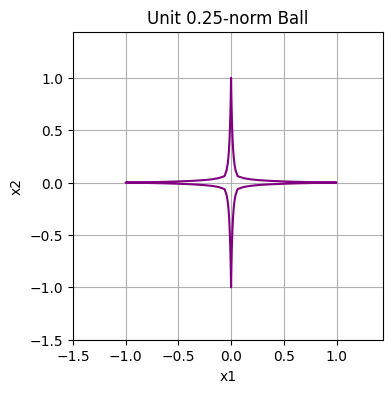

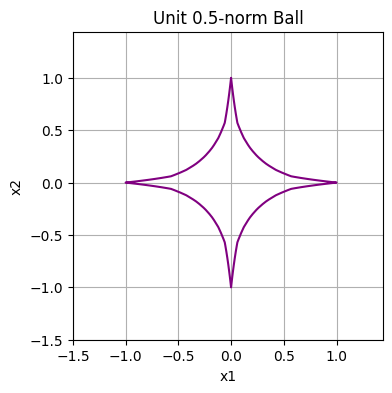

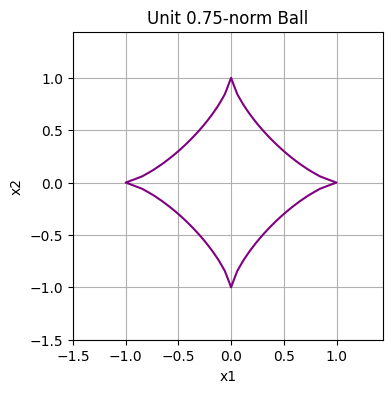

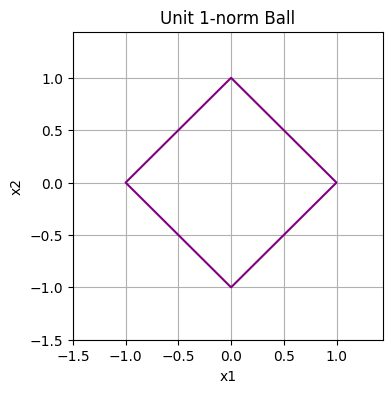

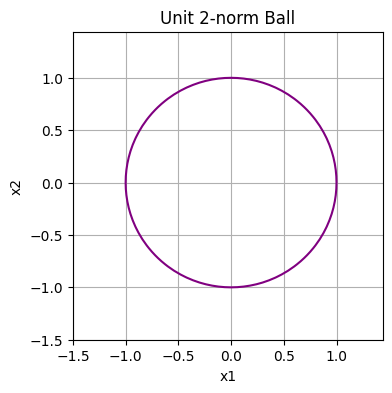

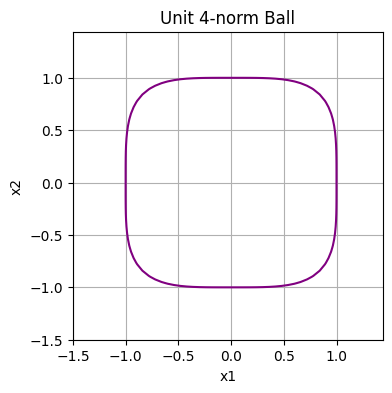

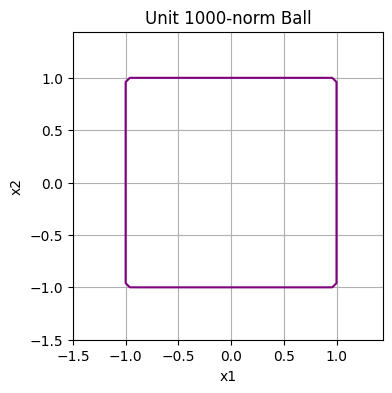

In [3]:
plot_unit_norm_ball(0.25)
plot_unit_norm_ball(0.5)
plot_unit_norm_ball(0.75)
plot_unit_norm_ball(1)
plot_unit_norm_ball(2)
plot_unit_norm_ball(4)
plot_unit_norm_ball(1000)

(b) Yes, from the plots, we observe that the unit norm balls for $p \gt 1$ are convex in nature. Informally, we conclude this from the fact that the line segment joining any two points within the unit norm ball lies entirely inside the region. Formally, this convexity can be described by the inequality:

$f(\frac{x_1 + x_2}{2} \le \frac{f(x_1)}{2} + \frac{f(x_2)}{2})$

However, from the plots, we can observe that the unit norm ball functions for $0 < p < 1$ are concave in nature. Informally, we can say that because line segment joining any two points within the region might lie outside the boundary of the unit norm ball (e.g., line joining (0, 1) and (1, 0)). Formally, concavity is described by the reverse inequality:

$f\left(\frac{x_1 + x_2}{2}\right) \ge \frac{f(x_1)}{2} + \frac{f(x_2)}{2}$


### **Question 3**: Entropy of a discrete random variable
(a)  Write a function that accepts a PMF as input and outputs the entropy in bits. Do check for the condition of a value being assigned zero probability.  
(b) Now use the above function to plot the entropy of X Bern(p) as a function of p. Where does this plot attain its maximum?

**Solution:**  
(a) Formula of entropy of a discrete random variable: $-\sum_{x \in X} p(x) log (p(x))$  
Note: Though an array is sufficient for the purpose of entropy, I used dictonary for just representation purpose

In [4]:
import numpy as np

def find_entropy_discrete(pmf):
    entropy = 0.0
    if sum(pmf.values()) != 1:
        print("The sum is not equal to 1. Either it is close to one, or invalid pmf. Theoretical entropy = ", end="")
    for probability in pmf.values():
        if(probability != 0):
            entropy -= probability * np.log2(probability)
    return entropy

pmf1 = {0: 0.75, 1: 0.25}
print(find_entropy_discrete(pmf1))

pmf2 = {0: 1, 1: 0, 2: 0}
print(find_entropy_discrete(pmf2))

pmf3 = {0: 1, 1: 1, 2: 0}
print(find_entropy_discrete(pmf3))

pmf4 = {0: 1/3, 1: 1/3, 2: 1/3}
print(find_entropy_discrete(pmf4))

pmf5 = {0: 0.333, 1: 0.333, 2: 0.333}
print(find_entropy_discrete(pmf5))

0.8112781244591328
0.0
The sum is not equal to 1. Either it is close to one, or invalid pmf. Theoretical entropy = 0.0
1.584962500721156
The sum is not equal to 1. Either it is close to one, or invalid pmf. Theoretical entropy = 1.584819511673234


(b) Bernoulli: X = 0 has probability p, and X = 1 has probability 1-p

### **Question 4**: Joint Entropy
$H(\mathcal{Y} \mid \mathcal{X})=\sum_{x \in \mathcal{X}} p(x) H(y \mid x=x) \\$  
$\text { Where } H(y \mid x=x)=-\sum_{y \in y} p(y \mid x) \log (p(y \mid x)) \\$  
$\Rightarrow H(\mathcal{Y} \mid \mathcal{X})=-\sum_{x \in x} p(x) \sum_{y \in y} p(y \mid x) \log (p(y \mid x)) \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x) \cdot \frac{p(y, x)}{\left(p(x)\right)} \log \left(\frac{p(x, y)}{p(x)}\right) \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x, y)[\log (p(x, y))-\log (p(x))] \\$  
$=-\sum_{x \in X} \sum_{y \in y} p(x, y) \log (p(x, y))+\sum_{x \in X} \sum_{y \in y} p(x, y) \log (p(x)) \\$  
$= H(\mathcal{X}, \mathcal{Y})+\sum_{x \in \mathcal{X}} \log (p(x)) \sum_{y \in y} p(x, y) \\$  
$= H(\mathcal{X}, \mathcal{Y})+\sum_{x \in \mathcal{X}} \log (p(x)) p(x)\\$  
$\implies H(\mathcal{Y} \mid \mathcal{X}) = H(\mathcal{X}, \mathcal{Y})-H(\mathcal{X})\\$  
$\implies H(\mathcal{X}, \mathcal{Y}) = H(\mathcal{Y} \mid \mathcal{X}) + H(\mathcal{X})\\$

### **Question 5**: Mutual Information
 $$I(\mathcal{X} ; \mathcal{Y})=\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} \log \left(\frac{p(x, y)}{p(x) p(y)}\right) p(x, y)$$
$\begin{aligned}  
 \text { (a) } & =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}}\left[\log \left(\frac{p(x, y)}{p(y)}\right) p(x, y)-\log (p(x)) \cdot p(x, y)\right] \\  
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}y} p(y) \times \frac{p(x, y)}{p(y)} \log \left(\frac{p(x, y)}{p(y)}\right)-\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log (p(x)) \\ 
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(y) \times p(x \mid y) \log (p(x \mid y))-\sum_{x \in \mathcal{X}} \log(p(x)) \sum_{y \in \mathcal{Y}} p(x, y) \\ 
 = & \sum_{y \in \mathcal{Y}} p(y)(-H(x \mid y=y))-\sum_{x \in \mathcal{X}} \log (p(x)) p(x) \\ 
 = & -H(\mathcal{X} \mid \mathcal{Y})+H(\mathcal{X})=H(\mathcal{X})-H(\mathcal{X} \mid \mathcal{Y}) \\
 \implies & I(\mathcal{X} ; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})
\end{aligned}$  

$\begin{aligned}  
 \text { (b) } & =\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}}\left[\log \left(\frac{p(x, y)}{p(x)}\right) p(x, y)-\log (p(y)) \cdot p(x, y)\right] \\  
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}y} p(x) \times \frac{p(x, y)}{p(x)} \log \left(\frac{p(x, y)}{p(x)}\right)-\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x, y) \log (p(y)) \\ 
 = & \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} p(x) \times p(y \mid x) \log (p(y \mid x))-\sum_{y \in \mathcal{Y}} \log(p(y)) \sum_{x \in \mathcal{X}} p(x, y) \\ 
 = & \sum_{y \in \mathcal{Y}} p(x)(-H(y \mid x=x))-\sum_{y \in \mathcal{Y}} \log (p(y)) p(y) \\ 
 = & -H(\mathcal{Y} \mid \mathcal{X})+H(\mathcal{Y})=H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X}) \\
 \implies & I(\mathcal{X} ; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})
\end{aligned}$ 

$\text{Hence Proved: } I(\mathcal{X}; \mathcal{Y}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X}) = H(\mathcal{Y})-H(\mathcal{Y} \mid \mathcal{X})$

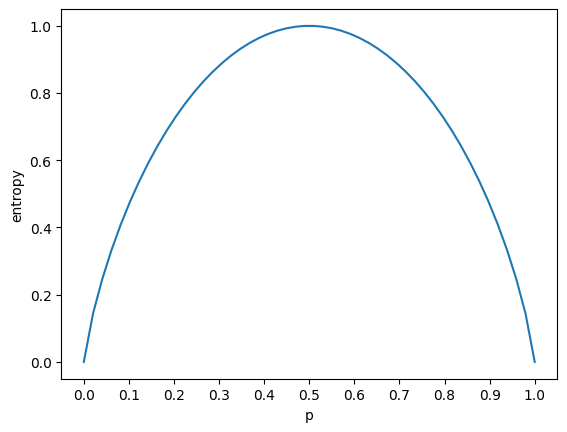

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli():
    p = np.linspace(0, 1, endpoint=True)
    entropies = []
    for prob in p:
        pmf = {0: prob, 1: 1-prob}
        entropy = find_entropy_discrete(pmf)
        entropies.append(entropy)
    plt.plot(p, entropies)
    plt.xticks(np.arange(min(pmf), max(pmf)+0.1, 0.1))
    plt.xlabel('p')
    plt.ylabel('entropy')
    plt.show()

bernoulli()

As we can see, maximum is obtained at p = 0.5, which is expected because since both have equal probability, the number of bits required would be maximum.

### **Question 6: Numerical Exercise**
Given $p(x=0, y=0) = p(x=0, y=1) = p(x=1, y=1)=\frac{1}{3} ; p(x=1, y=0) = 0$  
Find the following:

(a) $H(X), H(Y)$  
$$H(X) = -\sum_{x \in \mathcal{X}} p(x) log(p(x))$$  
$X = \{0, 1\}$  
Using marginal, we have  
$p(x = 0) = p(x=0, y=0)+p(x=0,y=1) = \frac{2}{3}$ and  
$p(x = 1) = p(x=1, y=0)+p(x=1,y=1) = \frac{1}{3}$  
  
$\implies H(X) = -p(0) log(p(0)) - p(1) log(p(1))$  
$\implies H(X) = -\displaystyle\frac{2}{3} log(\displaystyle\frac{2}{3}) - \displaystyle\frac{1}{3} log(\displaystyle\frac{1}{3})$  
$\implies H(X) = 0.919$ bits  
  
Similarly, for $H(Y)$, we have
$$H(Y) = -\sum_{y \in \mathcal{Y}} p(y) log(p(y))$$  
$Y = \{0, 1\}$  
Using marginal, we have  
$p(y = 0) = p(x=0, y=0)+p(x=1,y=0) = \frac{1}{3}$ and  
$p(y = 1) = p(x=0, y=1)+p(x=1,y=1) = \frac{2}{3}$  
  
$\implies H(Y) = -p(0) log(p(0)) - p(1) log(p(1))$  
$\implies H(Y) = -\displaystyle\frac{2}{3} log(\displaystyle\frac{2}{3}) - \displaystyle\frac{1}{3} log(\displaystyle\frac{1}{3})$  
$\implies H(Y) = 0.919$ bits 

In [6]:
print((1/3) * np.log2(1/3) + (2/3) * np.log2(2/3)) # rough work for 6a question

-0.9182958340544896


(b) $H(X|Y), H(Y|X)$  
The conditional entropy of $Y$ given $X$ is defined as
$$H(Y|X) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(x)}\right)$$  
$$H(X|Y) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(y)}\right)$$  
We have $p(X = 0) = p(Y = 1) = \frac{2}{3}$ and $p(X = 1) = P(Y = 0) = \frac{1}{3}$  


So we iterate with (x, y) = {(0,0), (0,1), (1,0), (1,1)}
#### H(Y|X)
$$H(Y|X) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(x)}\right)$$  
$\implies H(Y|X) = -p(x = 0, y = 0) log\left(\frac{p(x=0,y=0)}{p(x=0)}\right) - p(x = 0, y = 1) log\left(\frac{p(x=0,y=1)}{p(x=0)}\right) - p(x = 1, y = 0) log\left(\frac{p(x=1,y=0)}{p(x=1)}\right) - p(x = 1, y = 1) log\left(\frac{p(x=1,y=1)}{p(x=1)}\right)$  
$\implies H(Y|X) = -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) - 0 \times log_{2}\left(\frac{0}{\frac{1}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{1}{3}}\right)$  
$\implies H(Y|X) = \frac{1}{3} + \frac{1}{3} + 0 + 0$  
$\implies H(Y|X) = \frac{2}{3} = 0.67 bits$

#### H(X|Y)
$$H(X|Y) = - \sum_{x \in \mathcal{X}, y \in \mathcal{Y}} p(x,y) log\left(\displaystyle\frac{p(x,y)}{p(y)}\right)$$  
$\implies H(X|Y) = -p(x = 0, y = 0) log\left(\frac{p(x=0,y=0)}{p(y=0)}\right) - p(x = 0, y = 1) log\left(\frac{p(x=0,y=1)}{p(y=1)}\right) - p(x = 1, y = 0) log\left(\frac{p(x=1,y=0)}{p(y=0)}\right) - p(x = 1, y = 1) log\left(\frac{p(x=1,y=1)}{p(y=1)}\right)$  

$\implies H(X|Y) = -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{2}{3}}\right) - 0 \times log_{2}\left(\frac{0}{\frac{1}{3}}\right) -\frac{1}{3} \times log_{2}\left(\frac{\frac{1}{3}}{\frac{1}{3}}\right)$  

$\implies H(X|Y) = \frac{1}{3} + \frac{1}{3} + 0 + 0$  
$\implies H(X|Y) = \frac{2}{3} = 0.67 bits$

### **Question 10**: KL Divergence
(a) Write a funciton that accepts two PMFs $p$ and $q$ as input and outputs $D(p || q)$  

In [7]:
import numpy as np

ERROR_UNEQUAL_SPACES = -1
ERROR_INVALID_PMF = -2

def find_kl_divergence(p, q):
    if p.keys() != q.keys():
        return ERROR_UNEQUAL_SPACES 
    
    if sum(p.values()) != 1.0 or sum(q.values()) != 1.0:
        return ERROR_INVALID_PMF
    
    divergence = 0.0
    for key in p.keys():
        if p[key] != 0.0 and q[key] != 0.0:
            divergence += p[key] * np.log2(p[key]/q[key])
    
    return divergence

p = {0: 2/3, 1: 1/3}
q = {0: 1/2, 1: 1/2}
print(find_kl_divergence(p, q))
print(find_kl_divergence(q, p))

0.08170416594551039
0.08496250072115619


(b) Have $p = Bernoulli(r), q = Bernoulli(s)$

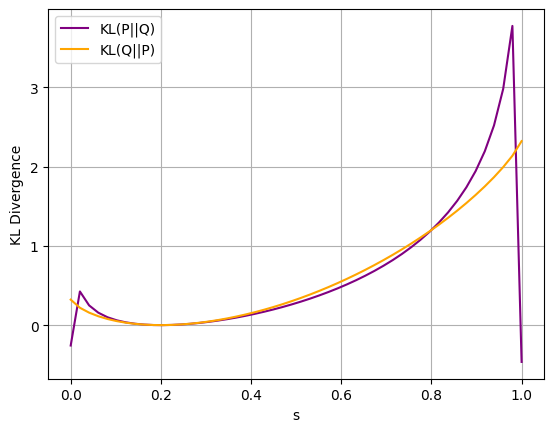

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_kl_divergence():
    r = 0.2
    s_space = np.linspace(0, 1)
    divergence_pq = []
    divergence_qp = []
    for s in s_space:
        p = {0: r, 1: 1-r} # pmf for bernolli(r)
        q = {0: s, 1: 1-s} # pmf for bernoulli(s)
        divergence_pq.append(find_kl_divergence(p, q))
        divergence_qp.append(find_kl_divergence(q, p))
    plt.plot(s_space, divergence_pq, color='purple', label='KL(P||Q)')
    plt.plot(s_space, divergence_qp, color='orange', label='KL(Q||P)')
    plt.grid(True)
    plt.xlabel('s')
    plt.ylabel('KL Divergence')
    plt.legend()
    plt.show()

plot_kl_divergence()

### **Question 7**: Image Entropy

(a) Write a function that accepts an image as input and returns its normalized histogram  
(b) Use your entropy function from the earlier problem to find the image entropy. Experiment with different gray scale images from the aforementioned link and note your observations.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = np.asarray(Image.open('5.1.12.tiff'))
print(repr(img))

array([[150, 144, 155, ..., 189, 188, 161],
       [189, 183, 185, ..., 185, 185, 121],
       [191, 184, 183, ..., 189, 183, 113],
       ...,
       [178, 180, 180, ..., 188, 185, 179],
       [182, 178, 174, ..., 207, 206, 207],
       [197, 192, 189, ..., 142, 155, 159]], dtype=uint8)


In [10]:
img.shape # is 256 * 256. The image is of dimension 256 * 256, and each img[i][j]'s value means intensity of pixel[i][j] from 0 to 256

(256, 256)

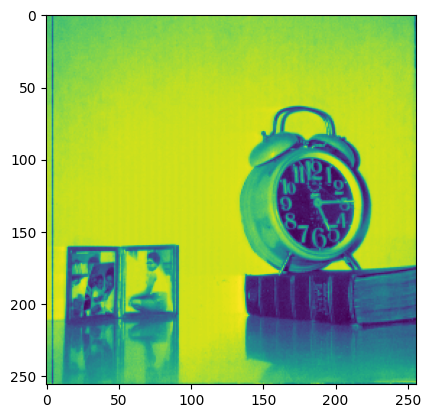

In [11]:
imgplot = plt.imshow(img)

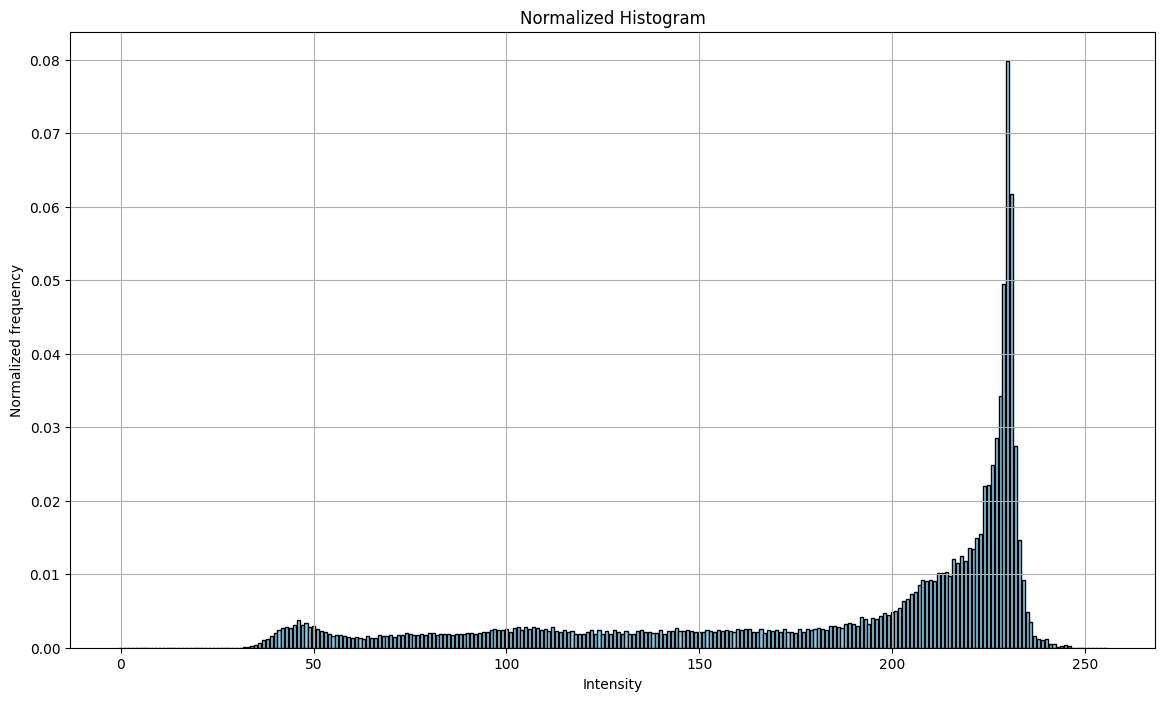

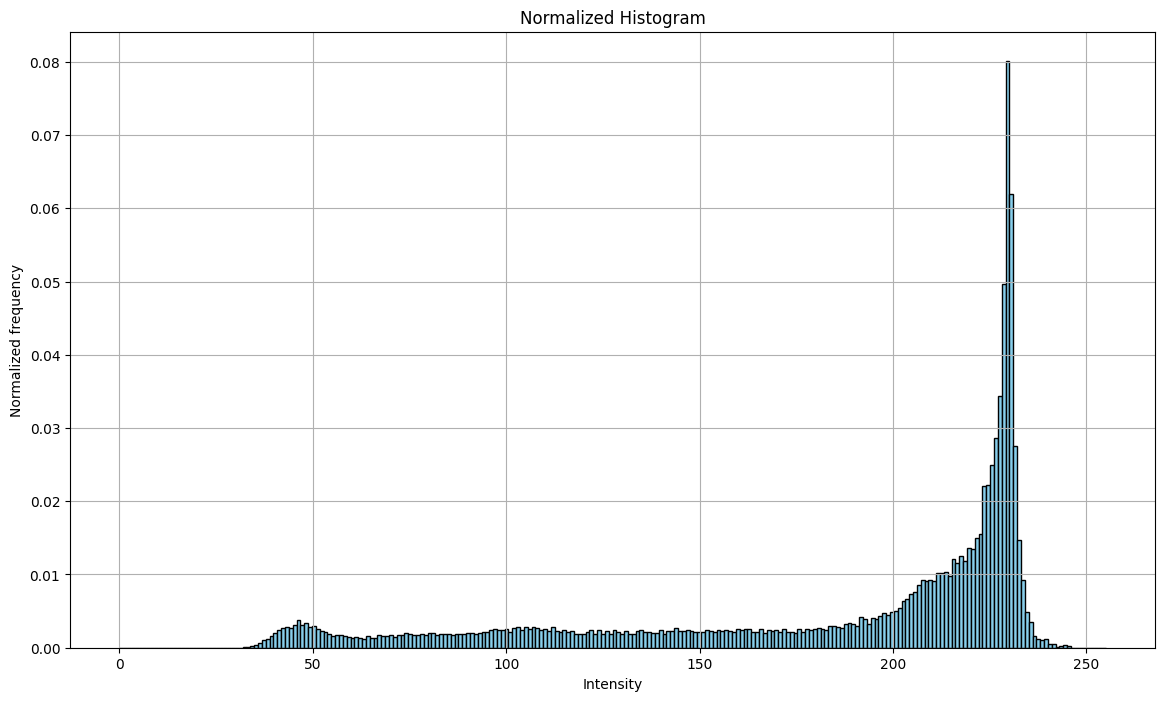

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# One which does not use the numpy library function
def get_normalized_historgram_of_image1(filepath):
    img = np.asarray(Image.open(filepath))
    freq = np.zeros(256)
    num_pixels = img.size
    for i in img:
        for j in i:
            freq[j] += 1
    freq = freq/num_pixels
    plt.figure(figsize=(14, 8))
    plt.bar(range(256), freq, color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.xlabel('Intensity')
    plt.ylabel('Normalized frequency')
    plt.title('Normalized Histogram')
    plt.show()

# One which uses numpy library function
def get_normalized_historgram_of_image2(filepath):
    img = np.asarray(Image.open(filepath))
    pixel_values = img.flatten()
    plt.figure(figsize=(14, 8))
    plt.hist(pixel_values, bins=256, range=(0, 255), density=True, color='skyblue', edgecolor='black')
    plt.grid(True)
    plt.xlabel('Intensity')
    plt.ylabel('Normalized frequency')
    plt.title('Normalized Histogram')
    plt.show()

get_normalized_historgram_of_image1('5.1.12.tiff')
get_normalized_historgram_of_image2('5.1.12.tiff')

In [13]:
import numpy as np
from PIL import Image

def get_image_entropy(filepath):
    img = np.asarray(Image.open(filepath))
    freq = np.zeros(256)
    num_pixels = img.size
    for i in img:
        for j in i:
            freq[j] += 1
    freq = freq/num_pixels
    
    entropy = 0
    for i in freq:
        if(i != 0):
            entropy -= i * np.log2(i)
    return entropy

print(get_image_entropy('5.1.12.tiff'))

6.705667200666731


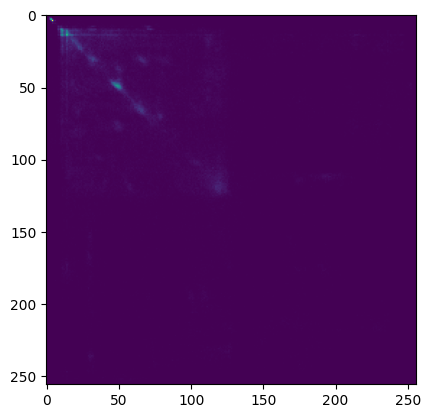

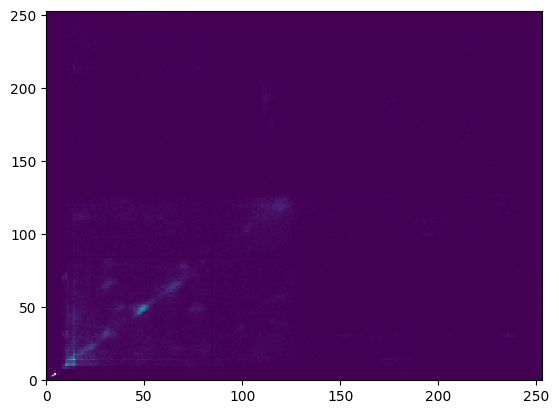

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.80844907e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.43605324e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def get_normalized_joint_histogram(left, right):
    left_image = np.asarray(Image.open(left))
    right_image = np.asarray(Image.open(right))

    if left_image.shape != right_image.shape:
        print("Both should be of same dimesnions")
        return None
    
    joint_histogram = np.zeros((256, 256))
    # Meaning of joint histogram: How often pairs of pixel with intensity i in left image corresponds to pixel with intensity j in right image

    for i in range(0, left_image.shape[0]): # i from 0 to img.rows
        for j in range(0, left_image.shape[1]): # j from 0 to img.cols
            left_img_pixel_intensity = left_image[i][j]
            right_img_pixel_intensity = right_image[i][j]
            joint_histogram[left_img_pixel_intensity][right_img_pixel_intensity] += 1
    
    joint_histogram = joint_histogram/(left_image.size)
    plt.imshow(joint_histogram)
    plt.show()
    plt.hist2d(left_image.flatten(), right_image.flatten(), bins=(256,256))
    plt.show()
    
    return joint_histogram


# Example usage:
get_normalized_joint_histogram('left.png', 'right.png')

In [15]:
import numpy as np

def get_joint_entropy(pmf):
    x_values = pmf.shape[0]
    y_values = pmf.shape[1]

    joint_entropy = 0
    for i in range(pmf.shape[0]):
        for j in range(pmf.shape[1]):
            prob = pmf[i][j]
            if prob > 0:
                joint_entropy -= prob * np.log2(prob)
    
    return joint_entropy

joint_pmf = np.array([[0.1, 0.2, 0.1],
                      [0.1, 0.1, 0.2],
                      [0.1, 0.05, 0.05]])

joint_pmf = np.array([[1/3, 0],[1/3, 1/3]])

# Calculate the joint entropy
entropy = get_joint_entropy(joint_pmf)
print("Joint Entropy:", entropy)

Joint Entropy: 1.584962500721156
